<a href="https://colab.research.google.com/github/EddyGiusepe/Exemplo_Regressao_Logistica/blob/main/Exemplo_Regressao_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de Regressão Logística

Aqui trabalharemos com um conjunto de Dados fictícios de **PUBLICIDADE**, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de Dados contém os seguintes recursos:

* ``Daily Time Spent on Site``: tempo no site em minutos.
* ``Age``: idade do consumidor.
* ``Area Income``: Média da renda do consumidor na região.
* ``Daily Internet Usage``: Média em minutos por dia que o consumidor está na internet.
* ``Linha do tópico do anúncio``: Título do anúncio.
* ``City``: Cidade do consumidor.
* ``Male``: Se o consumidor era ou não masculino.
* ``Country``: País do consumidor.
* ``Timestamp``: hora em que o consumidor clicou no anúncio ou janela fechada.
* ``Clicked on Ad``: $0$ ou $1$ indicam se clicou ou não no anúncio.


## Importamos as nossas bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report


%matplotlib inline


## Realizamos a leitura de nossos Dados

Vamos ler o arquivo ``advertising.csv`` e logo vamos gravar ele em um DataFrame chamado **ad_data**

In [2]:
ad_data = pd.read_csv('/content/drive/MyDrive/Programas_Python_do_Jupyter_Notebook_cursos_que_comprei/advertising.csv')

In [3]:
# Verificamos o cabeçado do ad_data

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# Também usamos o método: .info() e describe() em ad_data

ad_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análise de Dados exploratória

Vamos a usar ``Seaborn`` para explorar os Dados

Text(0.5, 0, 'Age')

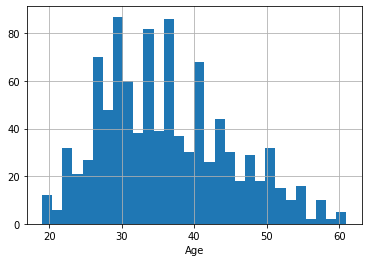

In [6]:
# Criamos um histograma de "Age"

ad_data['Age'].hist(bins=30)
plt.xlabel("Age")


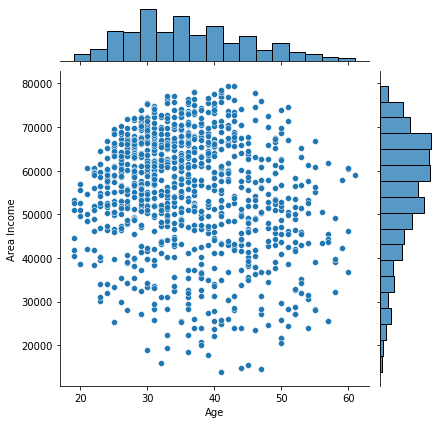

In [7]:
# Agora criamos um joinplot mostrando "Area Income" versus "Age"
# Se quisermos graficar todas as variáveis fazeriamos com PAIRPLOT

sns.jointplot(x='Age', y='Area Income', data=ad_data)


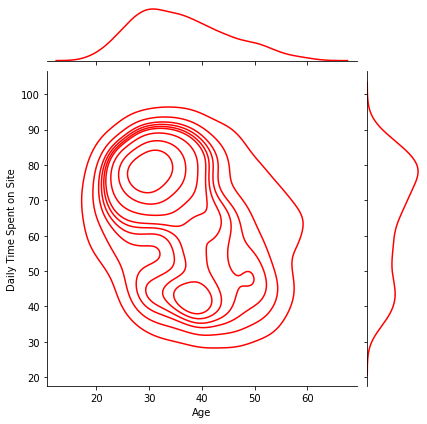

In [8]:
# Criamos um jointplot que mostre as distribuições KDE do 
# "Daily Time spent" no site vs "Age"



# Daily Time Spent on Site -->  Tempo no site em minutos.

# Em Estatística,  kernel density estimation (KDE--estimativa de densidade por Kernel) 
# é uma forma não-paramétrica para estimar a Função densidade de probabilidade (FDP) de uma variável
# aleatória. Estimativa da densidade por Kernel é um problema fundamental de suavização de dados 
# onde inferências sobre a população são feitas com base em uma amostra de dados finita.

sns.jointplot(x='Age', y='Daily Time Spent on Site' , data=ad_data, color='red', kind='kde')


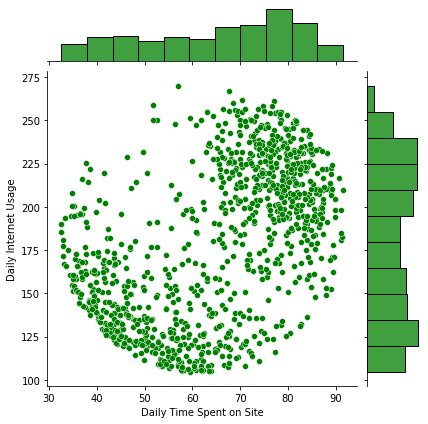

In [9]:
# Criamos um jointplot "Daily Time spent on Site" vs "Daily Internet Usage"

sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage',
              data=ad_data, color='green')


Também, criamos um ``parplot`` com o matiz definido pelo recurso de coluna 'Clicked on Ad'.

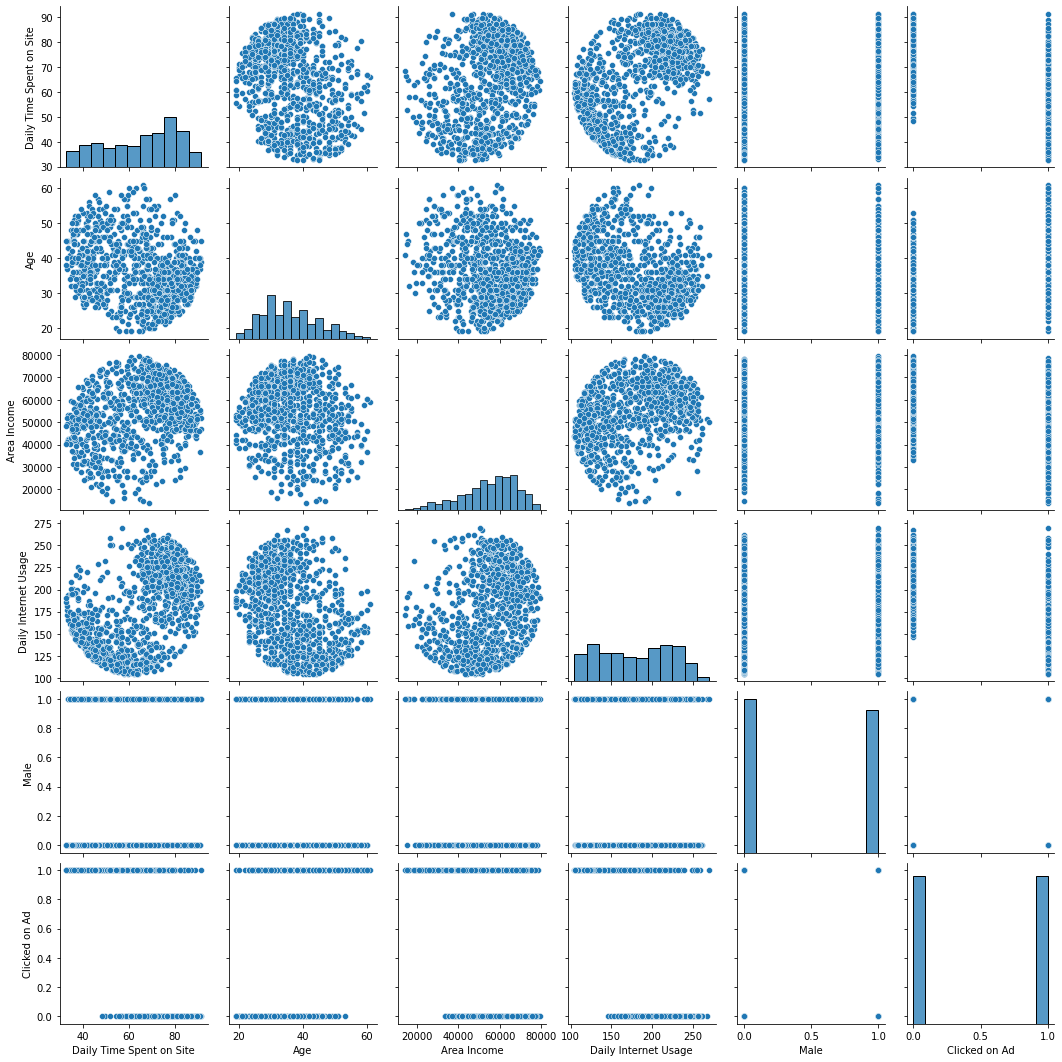

In [10]:
sns.pairplot(ad_data)

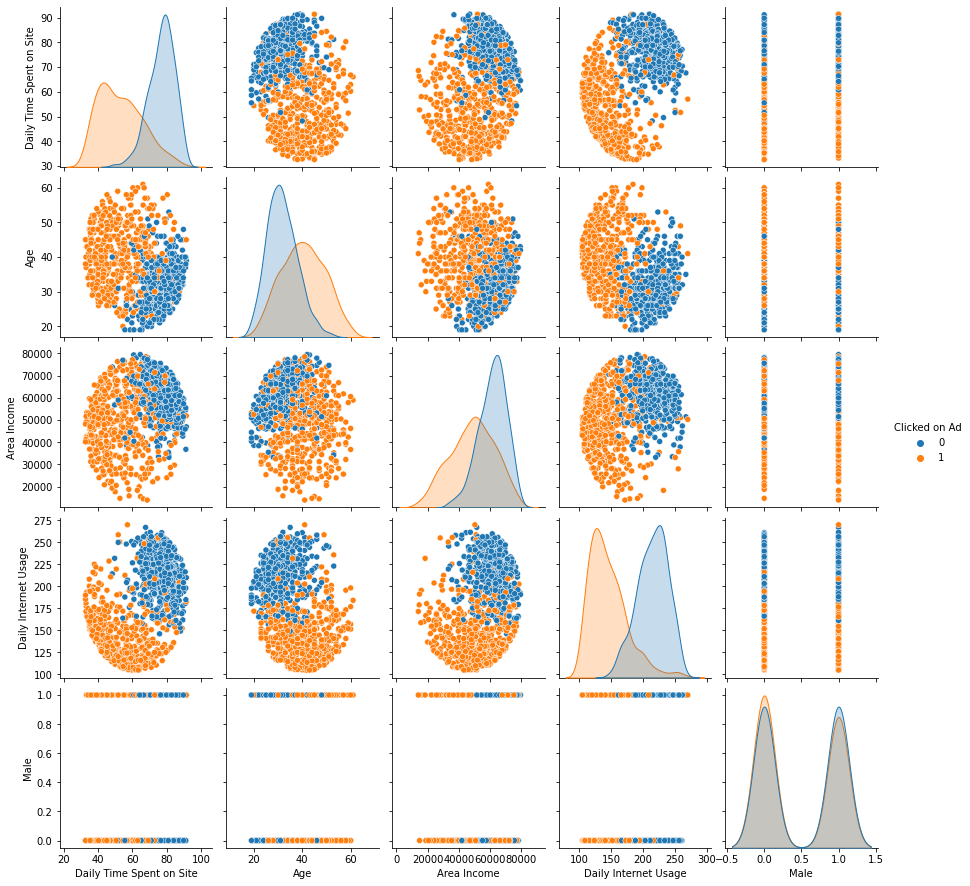

In [11]:
# Utilizamos "hue" para fazer uma separação
# Pode colocar: " palette='bwr' " , só que dá Warning

sns.pairplot(ad_data, hue='Clicked on Ad')


## Dividimos nossos Dados em treino e teste

Você terá a liberdade aqui para escolher colunas em que deseja treinar!

Divida os Dados em conjunto de treinamento e conjunto de testes usando ``train_test_split`` e logo fitamos ele.

In [12]:
# Em 'x' usamos dois colcheites porque queremos fazer uma seleção em multiples colunas

x = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

y = ad_data['Clicked on Ad']


In [13]:
# É bom colocar "test_size" entre 0.20 e 0.40.


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 

## Ajustamos nosso modelo de Regressão Logística no conjunto de treinamento

In [14]:
logmodel = LogisticRegression() 
logmodel.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Previsões e avaliações

Agora preveja valores para os dados de teste.

In [15]:
predict = logmodel.predict(x_test)


**Criamos um relatório de classificação para o modelo**

In [16]:
# Vamos comparar no valor de teste e o que o modelo prediz 

print(classification_report(y_test, predict))


# Podemos dizer que é um modelo muito bom (91% de certeza)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

